<a href="https://colab.research.google.com/github/vipin2010/GMT-instalation/blob/master/JAG_SVM_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/paper_JAG/Using R/Data/Training/train_Maoxian_negativeOnly.csv')
dataset.shape

(4596, 24)

In [ ]:
dataset

,Unnamed: 0,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,x_acf1,x_acf10,...,stab_cont,lump_cont,max_level_shift_cont,max_var_shift_cont,max_kl_shift_cont,crossing_points_cont,non_linearity_cont,var_cont,mean_cont,labels
0,1,0.636421,3.231072e-04,-4.765552,0.541824,-0.048087,0.130193,0.845234,0.456078,0.972085,...,0.304865,2.350208,14.061445,982.399657,24.495727,7,2.898827,334.586241,4.465594,1
1,2,0.232326,6.759253e-03,-0.335388,1.784151,-0.047753,0.154109,1.000000,0.049919,0.077979,...,0.154378,3.679426,14.368058,1056.921595,69.952306,16,3.075284,276.440802,3.700125,0
2,3,0.253394,2.640708e-03,-0.944338,2.226686,-0.175494,0.150530,1.000000,-0.002232,0.079681,...,0.181214,3.260450,14.172467,958.549460,49.010054,20,1.824531,266.968023,3.388694,0
3,4,0.381691,2.573460e-03,-2.110938,2.459011,-0.082919,0.129927,0.997343,0.165343,0.098650,...,0.212980,2.964957,14.879114,933.259132,53.929766,17,2.166952,274.244451,3.904103,0
4,5,0.616669,1.052496e-03,-3.076025,3.162137,-0.177686,0.071939,0.879829,0.351669,0.677337,...,0.329218,2.540179,18.017207,924.981599,41.165607,12,0.998373,294.417907,3.395697,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,4592,0.710596,4.195779e-04,-4.809756,1.768136,-0.025570,0.131395,0.689240,0.511739,1.210222,...,0.421767,2.002007,19.566287,909.112086,36.683590,9,1.071550,322.819710,3.554778,1
4592,4593,0.980189,8.866925e-07,-6.247005,-0.415516,-0.017248,0.278071,0.654292,0.898344,3.997271,...,0.946280,0.116188,21.512969,428.691906,1.032905,5,14.299445,685.277460,6.535661,2
4593,4594,0.891720,1.019684e-05,-5.091423,2.748267,-0.284462,0.276893,0.362566,0.789258,2.576779,...,0.828960,0.365877,32.367819,490.560565,4.652839,13,6.219649,428.229067,4.452095,2
4594,4595,0.978236,8.431141e-07,-6.221627,-0.341884,0.244673,0.187304,0.124563,0.918838,4.282990,...,0.885274,0.173451,26.264625,592.237881,1.375998,3,17.639188,704.284853,5.439121,2


In [ ]:
#ind=[1,2,3,4,7,8,9,14,15,16,17,18,20,21]
X = dataset.iloc[:,1:23]
y = dataset.iloc[:,23]


In [ ]:
X.head()

,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,x_acf1,x_acf10,diff1_acf1,...,diff2_acf10,stab_cont,lump_cont,max_level_shift_cont,max_var_shift_cont,max_kl_shift_cont,crossing_points_cont,non_linearity_cont,var_cont,mean_cont
0,0.636421,0.000323,-4.765552,0.541824,-0.048087,0.130193,0.845234,0.456078,0.972085,-0.260863,...,0.337827,0.304865,2.350208,14.061445,982.399657,24.495727,7,2.898827,334.586241,4.465594
1,0.232326,0.006759,-0.335388,1.784151,-0.047753,0.154109,1.000000,0.049919,0.077979,-0.170589,...,0.595878,0.154378,3.679426,14.368058,1056.921595,69.952306,16,3.075284,276.440802,3.700125
2,0.253394,0.002641,-0.944338,2.226686,-0.175494,0.150530,1.000000,-0.002232,0.079681,-0.365256,...,0.841076,0.181214,3.260450,14.172467,958.549460,49.010054,20,1.824531,266.968023,3.388694
3,0.381691,0.002573,-2.110938,2.459011,-0.082919,0.129927,0.997343,0.165343,0.098650,-0.234404,...,0.390513,0.212980,2.964957,14.879114,933.259132,53.929766,17,2.166952,274.244451,3.904103
4,0.616669,0.001052,-3.076025,3.162137,-0.177686,0.071939,0.879829,0.351669,0.677337,-0.300029,...,0.473934,0.329218,2.540179,18.017207,924.981599,41.165607,12,0.998373,294.417907,3.395697


In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25,random_state=109) # 80% training and 20% test
#Generating Model
#3:16 are non-reclassified columns, and 17:30 are reclassified columns
X_train=X_train1
X_test=X_test1
y_train=y_train1#.iloc[:5000]
y_test=y_test1#.iloc[:5000]
# importing the random forest model
#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(n_estimators = 500, random_state=6)
#regressor.fit(X_train, y_train)
#y_pred = regressor.predict(X_test)

In [ ]:
X_test.shape

(3447, 22)

In [ ]:
y_test

2340    1
3028    1
1299    1
381     0
1035    2
       ..
629     0
1565    0
3569    0
1083    0
1346    2
Name: labels, Length: 3447, dtype: int64

In [ ]:
#hyper tune your model
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV
#grid = {
#    'C':[0.01,0.1,1,10],
#    'kernel' : ["linear","poly","rbf","sigmoid"],
#    'degree' : [1,3,5,7],
#    'gamma' : [0.01,1]
#}
#svm = SVC()
#svm_cv = GridSearchCV(svm, grid, cv = 5)
#svm_cv.fit(X_train,y_train)
#print("Best Parameters:",svm_cv.best_params_)
#print("Train Score:",svm_cv.best_score_)
#print("Test Score:",svm_cv.score(X_test,y_test))

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clfsvm = svm.SVC(kernel='linear',C= 1, degree= 1, gamma= 0.01) # Linear Kernel

#Train the model using the training sets
clfsvm.fit(X_train, y_train)

#Predict the response for test dataset
y_predsvm = clfsvm.predict(X_test)





In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predsvm))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predsvm, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predsvm, average='macro'))
#print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_predsvm))

from sklearn.metrics import balanced_accuracy_score
# Model balanced accuracy:
print("Balanced_Accuracy:",balanced_accuracy_score(y_test, y_predsvm))

from sklearn.metrics import f1_score
print("f1_score:",f1_score(y_test, y_predsvm, average='macro'))

Accuracy: 0.8653901943719177
Precision: 0.8336159487689363
Recall: 0.7995182119505171
Balanced_Accuracy: 0.7995182119505171
f1_score: 0.8070944513473086


ValueError: ignored

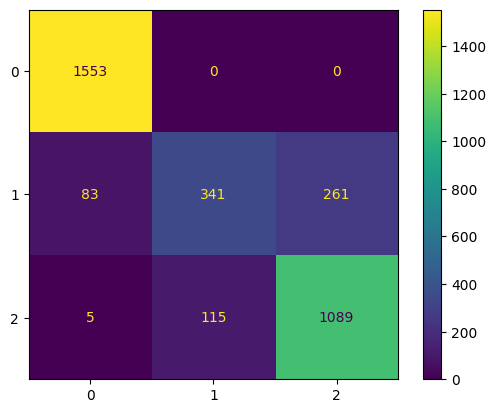

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predsvm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [ ]:
# Split dataset into training set and test set
##from sklearn.model_selection import train_test_split
##X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 80% training and 20% test
#Generating Model
#3:16 are non-reclassified columns, and 17:30 are reclassified columns
##X_train=X_train1.iloc[:, 3:17]
##X_test=X_test1.iloc[:, 3:17]
##from sklearn import metrics
#preds = model.predict(train_data)
#y_test = test_target
##print("accuracy: ", metrics.accuracy_score(y_test, y_predsvm))
##print("precision: ", metrics.precision_score(y_test, y_predsvm))
##print("recall: ", metrics.recall_score(y_test, y_predsvm))
##print("f1: ", metrics.f1_score(y_test, y_predsvm))
##print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_predsvm))

In [ ]:

# importing the test dataset
dataset1 = pd.read_csv('/content/drive/MyDrive/paper_JAG/Using R/Data/Testing/test_Kotropi_negatives.csv')

dataset1.shape

(4133, 25)

In [ ]:
dataset1.head()

,Unnamed: 0,lon,lat,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,...,diff2_acf10,stab_cont,lump_cont,max_level_shift_cont,max_var_shift_cont,max_kl_shift_cont,crossing_points_cont,non_linearity_cont,var_cont,mean_cont
0,2,76.892432,31.907993,0.851974,0.000113,-3.769906,2.081033,-0.036630,0.220021,0.658481,...,0.467246,0.132714,2.027671,9.370855,666.234101,22.700445,13,3.548384,330.836281,1.285110
1,3,76.892402,31.907988,0.789835,0.000149,-3.535691,2.040463,-0.105291,0.659577,0.587163,...,0.345509,0.556517,1.256352,22.401708,714.700475,6.742059,9,2.798571,450.872204,-6.552346
2,4,76.892359,31.907982,0.926624,0.000012,-4.180623,1.637485,0.112672,0.148794,0.413277,...,0.414674,0.778543,1.191319,28.706382,816.908242,13.910567,5,3.847078,529.229731,-11.302693
3,5,76.892792,31.908046,0.927102,0.000018,-4.217908,1.755435,-0.179182,0.282951,0.323952,...,1.461474,0.730088,1.266163,27.898387,848.228317,24.874942,5,2.570126,533.031514,-12.367555
4,6,76.892799,31.908047,0.923784,0.000015,-4.221067,1.701543,-0.146198,0.292760,0.511656,...,1.463285,0.877699,0.917565,38.403264,1138.136045,7.387376,3,2.377878,840.157772,-25.116635


In [ ]:
#ind1=[3,4,5,6,9,10,11,16,17,18,19,20,22,23]
test_data1=dataset1.iloc[:,3:25]


In [ ]:
test_data1

,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,x_acf1,x_acf10,diff1_acf1,...,diff2_acf10,stab_cont,lump_cont,max_level_shift_cont,max_var_shift_cont,max_kl_shift_cont,crossing_points_cont,non_linearity_cont,var_cont,mean_cont
0,0.851974,0.000113,-3.769906,2.081033,-0.036630,0.220021,0.658481,0.751439,1.229425,-0.271041,...,0.467246,0.132714,2.027671,9.370855,666.234101,22.700445,13,3.548384,330.836281,1.285110
1,0.789835,0.000149,-3.535691,2.040463,-0.105291,0.659577,0.587163,0.654130,0.899310,-0.232730,...,0.345509,0.556517,1.256352,22.401708,714.700475,6.742059,9,2.798571,450.872204,-6.552346
2,0.926624,0.000012,-4.180623,1.637485,0.112672,0.148794,0.413277,0.806274,1.346067,-0.211494,...,0.414674,0.778543,1.191319,28.706382,816.908242,13.910567,5,3.847078,529.229731,-11.302693
3,0.927102,0.000018,-4.217908,1.755435,-0.179182,0.282951,0.323952,0.791469,1.482312,-0.414672,...,1.461474,0.730088,1.266163,27.898387,848.228317,24.874942,5,2.570126,533.031514,-12.367555
4,0.923784,0.000015,-4.221067,1.701543,-0.146198,0.292760,0.511656,0.788074,1.459151,-0.405615,...,1.463285,0.877699,0.917565,38.403264,1138.136045,7.387376,3,2.377878,840.157772,-25.116635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,0.853226,0.000102,-4.157497,1.087412,-0.105364,0.148059,0.559081,0.682553,1.019578,-0.463503,...,0.692560,0.677335,1.169879,31.814384,1142.876094,5.805076,9,2.766871,747.160221,-22.288558
4129,0.576297,0.001034,-3.574037,0.618241,-0.088714,0.260302,0.831382,0.429243,0.484604,-0.354346,...,0.463491,0.714909,1.185322,28.771132,891.386863,10.304590,9,2.124572,578.939348,-13.540311
4130,0.300130,0.002017,-1.844591,-0.669781,-0.343490,0.631401,0.854908,0.023472,0.332597,-0.670394,...,2.108015,0.657319,1.337733,27.237122,923.030125,22.578673,7,3.743988,564.307858,-14.431219
4131,0.145229,0.003431,-0.142669,-1.408931,-0.213703,0.171796,1.000000,-0.032735,0.095002,-0.486716,...,0.590924,0.430911,1.495764,20.502389,843.602491,20.068796,5,2.746462,487.743271,-9.138254


In [ ]:
y_predsvmtest1 = clfsvm.predict(test_data1)

In [ ]:
y_predsvmtest1

array([2, 1, 1, ..., 1, 1, 1])

In [ ]:
df_pred = pd.DataFrame(y_predsvmtest1, columns = ['Pred_Lable'])

In [ ]:
df_pred

,Pred_Lable
0,2
1,1
2,1
3,1
4,1
...,...
4128,1
4129,1
4130,1
4131,1


In [ ]:
Pred_data=pd.concat([dataset1,df_pred],axis=1, join='inner')
print(Pred_data)

      Unnamed: 0        lon        lat     trend     spike  linearity  \
0              2  76.892432  31.907993  0.851974  0.000113  -3.769906   
1              3  76.892402  31.907988  0.789835  0.000149  -3.535691   
2              4  76.892359  31.907982  0.926624  0.000012  -4.180623   
3              5  76.892792  31.908046  0.927102  0.000018  -4.217908   
4              6  76.892799  31.908047  0.923784  0.000015  -4.221067   
...          ...        ...        ...       ...       ...        ...   
4128        4130  76.884311  31.914948  0.853226  0.000102  -4.157497   
4129        4131  76.884493  31.914975  0.576297  0.001034  -3.574037   
4130        4132  76.884587  31.914989  0.300130  0.002017  -1.844591   
4131        4133  76.884576  31.914987  0.145229  0.003431  -0.142669   
4132        4134  76.883598  31.914970  0.145500  0.003266   1.796331   

      curvature    e_acf1   e_acf10   entropy  ...  stab_cont  lump_cont  \
0      2.081033 -0.036630  0.220021  0.658481  

In [ ]:
df2 = Pred_data #pd.DataFrame(y_predsvmtest1)

df2.to_csv ('/content/drive/MyDrive/paper_JAG/Using R/Data/Prediction/Pred_SVM_MaoxiantestKotropiNegatives_simu__tuned_14Features.csv', index = False, header=True)